## LLM Calling with LangChain

### Check the environment setup

Prerequisites:
- Python 3.8+ (preferably 3.11)
- virtual environment
- required packages installation
- jupyter notebook and jupter kernel

to install everything, run:
```
python -m venv venv

# for windows:
.\venv\Scripts\activate
# or for macos/linux:
source venv/bin/activate

pip install --upgrade pip
pip install -r requirements.txt
pip install jupyter ipykernel
python -m ipykernel install --user --name=llm_course_kernel --display-name "LLM Course Kernel"

jupyter notebook

```

In [1]:
print("Hello, World!")

Hello, World!


In [2]:
# Check if langchain is installed
import langchain
print(langchain.__version__)

1.0.3


In [3]:
# import necessary modules
from dotenv import load_dotenv
load_dotenv()

True

### Initialize gpt-4.1 chat competion model

In [4]:
from langchain_openai import ChatOpenAI
import os

llm = ChatOpenAI(model="openai/gpt-4.1")

response = llm.invoke("Tell me a joke.")
print("Model response:", response.content)


Model response: Why don’t skeletons fight each other?

They don’t have the guts!


### Now let's see difference between different types of messages

In [5]:
from langchain_core.messages import HumanMessage, SystemMessage

response = llm.invoke([
    SystemMessage(content="You are a jokester. Whatever user asks you - always reply with some kind of light hearted joke."),
    HumanMessage(content="Hi")
])

print("Model response:", response.content)

Model response: Hey there! Why did the scarecrow win an award? Because he was outstanding in his field! 🌾😄


### Task 1:
Write a function with a custom built-in system prompt that accepts llm instance and user query as parameters and returns the llm response.

In [6]:
def invoke_custom_call(llm: ChatOpenAI, user_query: str) -> str:
    ...



In [7]:
print(invoke_custom_call(llm, "What are your instructions?"))

None


### Models can also work with images
To work with images, the model needs to be _multimodal_ (which means that it can accept and/or output different media types, such as text, images, audio, video, etc.). GPT-4.1 is a multimodal model that can accept both text and image inputs.

In [8]:
def encode_image_to_base64(image_path: str) -> str:
    import base64
    with open(image_path, "rb") as image_file:
        encoded_string = base64.b64encode(image_file.read()).decode("utf-8")
    return encoded_string

In [9]:
response = llm.invoke([
    HumanMessage(content=[
        {"type": "text", "text": "Describe the image."},
        {
            "type": "image_url",
                "image_url": {"url": f"data:image/png;base64,{encode_image_to_base64('./data/images/cat.jpg')}"}
        }
    ])
])

print("Model response:", response.content)

Model response: The image shows an adorable orange kitten wearing a bright orange costume designed to look like a jack-o'-lantern pumpkin. The costume has a hood with a stem and leaf on top and features a black jack-o'-lantern face on the front. The kitten is surrounded by small plastic pumpkins with similar jack-o'-lantern faces, and the background is blurry brickwork, giving a cozy, Halloween-themed atmosphere. The kitten's wide, curious eyes and the festive setting make the image very cute and seasonal.


### Task 2: read "sign.jpg" image and ask model for directions.
Make model tell you distance and actions to arrive to Rivne, or how much time left to Zhytomyr.

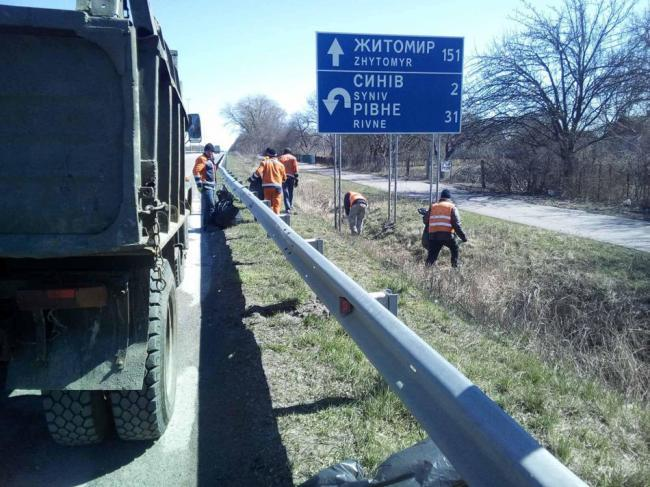

In [10]:
from IPython.display import Image
Image(filename='./data/images/sign.jpg')

In [11]:
# Your code here
response = None



print("Model response:", response)

Model response: None


### More data about model response

In [12]:
from pprint import pprint

response = llm.invoke("Tell me a joke.")

pprint(response.content)
pprint(response.response_metadata)

('Why did the scarecrow win an award?\n'
 '\n'
 'Because he was outstanding in his field! 🌾😄')
{'finish_reason': 'stop',
 'id': 'gen-1761820531-DuGnz6RWqztyXF9CY6yZ',
 'logprobs': None,
 'model_name': 'openai/gpt-4.1',
 'model_provider': 'openai',
 'system_fingerprint': None,
 'token_usage': {'completion_tokens': 22,
                 'completion_tokens_details': {'accepted_prediction_tokens': None,
                                               'audio_tokens': None,
                                               'reasoning_tokens': 0,
                                               'rejected_prediction_tokens': None},
                 'prompt_tokens': 12,
                 'prompt_tokens_details': None,
                 'total_tokens': 34}}


### Prompt templates
for complex prompts with multiple variables it's better to use prompt templates

In [13]:
from langchain_core.prompts import PromptTemplate

prompt_template = PromptTemplate.from_template("Tell me a joke about {topic}.")

response = llm.invoke(
    prompt_template.format_prompt(topic="computers").to_messages()
)

print("Model response:", response.content)

Model response: Why did the computer show up at work late?

Because it had a hard drive!


In [14]:
prompt_template = PromptTemplate.from_template(
    "Tell me a {adjective} joke about {animal} in a {setting}."
)

response = llm.invoke(
    prompt_template.format_prompt(adjective="funny", animal="dog", setting="space station").to_messages()
)

print("Model response:", response.content)

Model response: Why did the dog bring a bone to the space station?

Because he heard it was a great place for some *lunar* chewing! 🐕🚀🌕


### Newer models use reasoning techniques to improve the quality of responses
Chain of Thought (CoT) prompting is a technique used to enhance the reasoning capabilities of language models. By encouraging the model to break down complex problems into smaller, manageable steps, CoT prompting helps improve the accuracy and coherence of the generated responses.
Modern models come with built-in CoT capabilities that are not needed to be explicitly prompted.

In [15]:
llm = ChatOpenAI(model="openai/gpt-5-mini")

response = llm.invoke("Tell me a joke.")

print("Model response:", response.content)
pprint(response.response_metadata)

Model response: Why don't scientists trust atoms? Because they make up everything.

Want another?
{'finish_reason': 'stop',
 'id': 'gen-1761820535-gcim98YrMX4zqeV4Due3',
 'logprobs': None,
 'model_name': 'openai/gpt-5-mini',
 'model_provider': 'openai',
 'system_fingerprint': None,
 'token_usage': {'completion_tokens': 149,
                 'completion_tokens_details': {'accepted_prediction_tokens': None,
                                               'audio_tokens': None,
                                               'reasoning_tokens': 128,
                                               'rejected_prediction_tokens': None},
                 'prompt_tokens': 11,
                 'prompt_tokens_details': None,
                 'total_tokens': 160}}


### Reasoning effort:
low, medium, high

In [16]:
llm = ChatOpenAI(model="openai/gpt-5-mini", reasoning_effort="high")
response = llm.invoke("Tell me a joke.")
print("Tokens used with high reasoning effort:" , response.response_metadata['token_usage'])

llm = ChatOpenAI(model="openai/gpt-5-mini", reasoning_effort="low")
response = llm.invoke("Tell me a joke.")
print("Tokens used with low reasoning effort:" , response.response_metadata['token_usage'])

Tokens used with high reasoning effort: {'completion_tokens': 278, 'prompt_tokens': 11, 'total_tokens': 289, 'completion_tokens_details': {'accepted_prediction_tokens': None, 'audio_tokens': None, 'reasoning_tokens': 256, 'rejected_prediction_tokens': None}, 'prompt_tokens_details': None}
Tokens used with low reasoning effort: {'completion_tokens': 18, 'prompt_tokens': 11, 'total_tokens': 29, 'completion_tokens_details': {'accepted_prediction_tokens': None, 'audio_tokens': None, 'reasoning_tokens': 0, 'rejected_prediction_tokens': None}, 'prompt_tokens_details': None}


### Model settings:
temperature, max_tokens, top_p, etc.

In [ ]:
## Temperature setting example

llm_creative = ChatOpenAI(model="openai/gpt-4.1", temperature=0.9)
llm_deterministic = ChatOpenAI(model="openai/gpt-4.1", temperature=0.1)
user_query = HumanMessage("Tell me a short story about a little cat.")

response_creative = llm_creative.invoke([user_query])
response_deterministic = llm_deterministic.invoke([user_query])

print("Creative response:", response_creative.content)
print("Deterministic response:", response_deterministic.content)


print("Tokens used in creative response:" , response_creative.response_metadata['token_usage'])

In [ ]:
## Max tokens setting example

llm_creative = ChatOpenAI(model="openai/gpt-4.1", temperature=0.9, max_tokens=50)
user_query = HumanMessage("Tell me a short story about a little cat.")

response_creative = llm_creative.invoke([user_query])
print("Creative response:", response_creative.content)
print("Tokens used in creative response:" , response_creative.response_metadata['token_usage'])


In [ ]:
# Max tokens + prompting example

llm_creative = ChatOpenAI(model="openai/gpt-4.1", temperature=0.9, max_tokens=50)
user_query = HumanMessage("Tell me a short story about a little cat. Do not use more than 50 tokens.")

response_creative = llm_creative.invoke([user_query])
print("Creative response:", response_creative.content)
print("Tokens used in creative response:" , response_creative.response_metadata['token_usage'])


In [ ]:
from IPython.display import Image
Image(filename='./data/images/example.png')

Top p

In [ ]:
llm_creative = ChatOpenAI(model="openai/gpt-4.1", temperature=0.9, max_tokens=50, top_p=0.5)
user_query = HumanMessage("Tell me a short story about a little cat.")
response_creative = llm_creative.invoke([user_query])
print("Creative response:", response_creative.content)

### Structured output

In [ ]:
from pydantic import BaseModel, Field

class ContactInfo(BaseModel):
    """Contact information for a person."""
    name: str = Field(description="The name of the person")
    email: str = Field(description="The email address of the person")
    phone: str = Field(description="The phone number of the person")

In [ ]:
llm = ChatOpenAI(model="openai/gpt-4.1", temperature=0).with_structured_output(ContactInfo)
response = llm.invoke("Provide contact information for John Doe, a software engineer at Example Corp. Their phone number is 123-456-7890")
response

This only outputs the structured data itself. To get the full response with text and structured data, use `include_raw=True`.

In [ ]:
llm = ChatOpenAI(model="openai/gpt-4.1", temperature=0).with_structured_output(ContactInfo, include_raw=True)
response = llm.invoke("Provide contact information for John Doe, a software engineer at Example Corp. Their phone number is 123-456-7890")
pprint(response)
print("\n\n")
pprint(response["parsed"])


### Task 3:
Create a structured output model for a book with the following fields: title, author, publication_year, score (1-10).
Find an online text review of any book.
Use system prompt to instruct the model to extract the book information from the review and return it in the structured format.
Bind the structured output model to the llm instance as shown above, and use prompt template to pass arbitrary review text to the model.

In [ ]:
## Your code goes here
